1. 시작 연도부터 끝나는 연도년까지 대구 기온 데이터에서 특정 월의 최고 기온 및 최저 기
온의 평균값을 구하고 그래프로 표현 하시오.

n daegu_utf8.csv 파일 이용
n 데이터 구조
['날짜', '지점', '평균기온', '최저기온', '최고기온’]
[0] [1] [2] [3] [4]
n 화면에서 측정할 달을 입력받아서 진행
n 해당 기간 동안 최고기온 평균값 및 최저기온 평균값 계산
- 최고기온 및 최저기온 데이터를 이용하여 입력된 달의 각각 평균값을 구함
- 문자열 형태의 ‘날짜’ 열의 데이터는 datetime으로 변경함:
n 하나의 그래프 안에 2개의 꺾은선 그래프로 결과를 출력
- 마이너스 기호 출력 깨짐 방지
- 입력된 월을 이용하여 그래프의 타이틀 내용 변경
- 최고 온도는 빨간색, 최저 온도는 파란색으로 표시하고 각각 마커 및 legend를 표시
- 다른 운영체제에서도 동작할 수 있도록 platform 모듈을 사용하여 운영체제를
구분하여 한글 폰트 지정할 것

In [63]:
import pandas as pd
import numpy as np
import csv
FILENAME = 'daegu_utf8.csv'
df = pd.read_csv(FILENAME)
df

,날짜,지점,평균기온,최저기온,최고기온
0,1909-01-01,143,-4.1,-8.0,0.1
1,1909-01-02,143,-0.8,-6.7,6.1
2,1909-01-03,143,1.0,-2.4,3.6
3,1909-01-04,143,4.2,0.0,9.2
4,1909-01-05,143,3.4,-0.4,9.0
...,...,...,...,...,...
41445,2022-06-26,143,28.4,24.4,32.8
41446,2022-06-27,143,27.3,25.4,30.1
41447,2022-06-28,143,28.9,24.8,32.3
41448,2022-06-29,143,29.5,27.7,33.7


In [64]:
# 운영체제 플랫폼 구별 및 한글 폰트 설정
import platform
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

system_name = platform.system()
if system_name == 'Windows':
    print('Windows OS')
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    print('Mac OS')
    plt.rc('font', family= 'AppleGothic')
elif system_name == 'Linux':
    print('Linux OS')
    path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
    font_name = fm.FontProperties(fname=path, size=12)
    plt.rc('font', family=font_name)
else:
    print('Not Support')

Windows OS


In [65]:
df['날짜'] = pd.to_datetime(df['날짜'])

실행결과
1991년부터 1999년까지 5월의 기온 변화

12월 최저기온 평균: 
12.6, 11.8, 12.6, 13.5, 12.0, 13.1, 13.9, 14.6, 13.7, 
12월 최고기온 평균: 
24.5, 24.1, 25.3, 25.3, 24.9, 26.1, 25.9, 25.4, 25.4, 

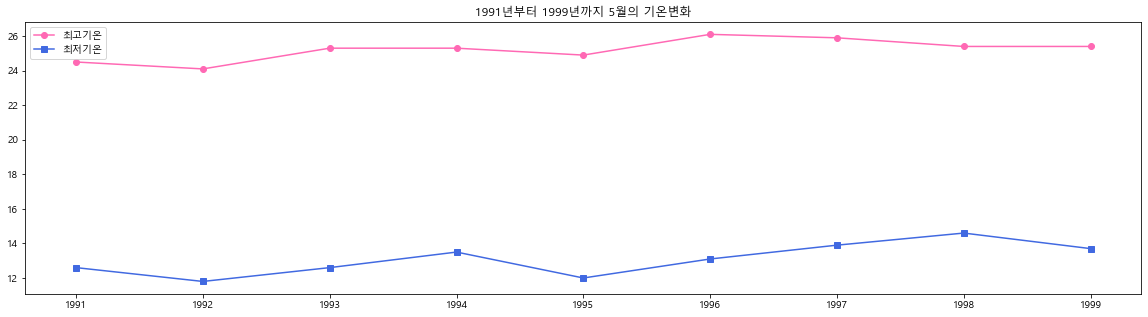

In [66]:
def month_mean():
    start = input("시작 연도를 입력하세요: ")
    end = input("마지막 연도를 입력하세요: ")
    month = input("기온 변화를 측정할 달을 입력하세요: ")
    cond1 = df['날짜'].dt.year >= int(start)
    cond2 = df['날짜'].dt.year <= int(end)
    cond3 = df['날짜'].dt.month == int(month)
    cond_df = df[cond1 & cond2 & cond3].copy()
    cond_df['연'] = cond_df['날짜'].dt.year
    high = cond_df.groupby('연')['최고기온'].mean().round(1)
    low = cond_df.groupby('연')['최저기온'].mean().round(1)


    print('실행결과')
    print(f'{start}년부터 {end}년까지 {month}월의 기온 변화')
    print()
    print('12월 최저기온 평균: ')
    for i in low:
        print(i, end=', ')
    print()
    print('12월 최고기온 평균: ')
    for i in high:
        print(i, end=', ')

    plt.figure(figsize=(20,5))
    plt.rcParams['axes.unicode_minus'] = False
    plt.rc('font', family= 'Malgun Gothic')
    plt.plot(high.index, high,'hotpink', marker='o', label='최고기온')
    plt.plot(high.index, low,'royalblue', marker='s', label='최저기온')
    plt.title(f'{start}년부터 {end}년까지 {month}월의 기온변화')
    plt.legend()
    plt.show()

month_mean()

